## BlackSheep Cookbook MSI Down Regulation

The Black Sheep Analysis allows researchers to find trends in abnormal protein enrichment among patients in CPTAC datasets. In this Cookbook, we will go through the steps needed to perform a full Black Sheep Analysis, to answer a research question, of if MSI Down-regulation plays a role in protein enrichments for patients with Endometrial Cancer.

### Step 1a: Import Dependencies
First, import the necessary dependencies and install cptac through pip (if necessary).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cptac
import binarization_functions as bf
import blackSheepCPTACmoduleCopy as blsh
en = cptac.Endometrial()

Welcome to cptac, a python package for disseminating cancer
proteogenomics data. To view available datasets, enter
'cptac.list_data()'. Extensive tutorials are available at
https://github.com/PayneLab/cptac/tree/master/doc

******
Version: 0.4.5
******
Checking that data files are up-to-date...
100% [..................................................................................] 649 / 649
Data check complete.
endometrial data version: 2.1

Loading acetylproteomics data...
Loading clinical data...
Loading CNA data...
Loading definitions data...
Loading miRNA data...
Loading phosphoproteomics_gene data...
Loading phosphoproteomics_site data...
Loading proteomics data...
Loading somatic data...
Loading somatic_binary data...
Loading transcriptomics_circular data...
Loading transcriptomics_linear data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utiliz

## Step 1b: Load Data and Choose Omics Table
In this analysis, we will be using the proteomics and transcriptomics tables.

In [2]:
proteomics = en.get_proteomics()
mRNA = en.get_transcriptomics()
clinical = en.get_clinical()

In [3]:
#Append Genomics_subtype and MSI_status to en.get_clinical()
derived_molecular = en.get_derived_molecular()
clinical['MSI_status'] = derived_molecular['MSI_status']

## Step 2: Determine what attributes you would like to A/B test. 
For this analysis, we will be testing MSI_status.

In [4]:
#Create a subset copy of the original Clinical DataFrame for MSI.
annotations = pd.DataFrame(clinical['MSI_status'].copy())

## Step 3: Perform outliers analysis

In [5]:
outliers_prot = blsh.make_outliers_table(proteomics, iqrs=1.5, 
                                         up_or_down='down', 
                                         aggregate=False, 
                                         frac_table=False)

outliers_mRNA = blsh.make_outliers_table(mRNA, iqrs=1.5, 
                                         up_or_down='down', 
                                         aggregate=False, 
                                         frac_table=False)

C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


## Step 4: Wrap your A/B test into the outliers analysis, and create tables of the results.

In [47]:
#Potentially show the the name of the dataset we're working with.
print("Testing for proteomics dataset:\n")
results_prot = blsh.compare_groups_outliers(outliers_prot, 
                                            annotations)

print("\nTesting for transcriptomics dataset:\n")
results_mRNA = blsh.compare_groups_outliers(outliers_mRNA, 
                                            annotations)

Testing for proteomics dataset:

No rows had outliers in at least 0.3 of MSI_status MSS samples
Testing 10 rows for enrichment in MSI_status MSI-H samples

Testing for transcriptomics dataset:

No rows had outliers in at least 0.3 of MSI_status MSS samples
Testing 39 rows for enrichment in MSI_status MSI-H samples


Many of the return values from the compare_groups_outliers function are NaN, so we will drop the unnecessary values

In [7]:
results_prot = results_prot.dropna(axis=0, how='all')
results_mRNA = results_mRNA.dropna(axis=0, how='all')

## Step 5: Visualize these enrichments

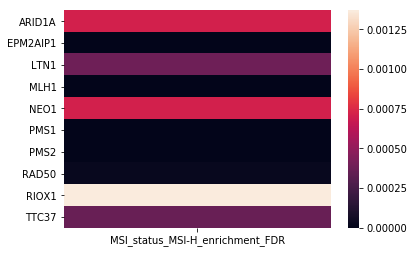

In [8]:
sns.heatmap(results_prot)
plt.show()

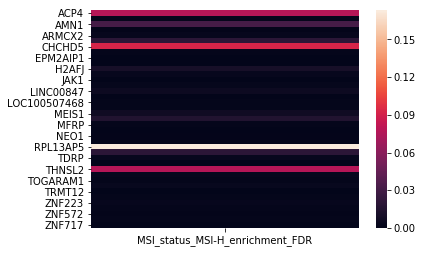

In [9]:
sns.heatmap(results_mRNA)
plt.show()

## Step 6: Determine significant enrichments, and link with cancer drug database.

In [10]:
#Check for significant columns in proteomics
for col in results_prot.columns:
    bf.significantEnrichments(results_prot, col)

#Check for significant columns in proteomics
for col in results_mRNA.columns:
    bf.significantEnrichments(results_mRNA, col)

10 significant protein enrichments in MSI_status_MSI-H

35 significant protein enrichments in MSI_status_MSI-H



In [11]:
#Store the dataframe of significant enrichments
column = 'MSI_status_MSI-H_enrichment_FDR'
sig_results_prot = bf.significantEnrichments(results_prot, column)
sig_results_mRNA = bf.significantEnrichments(results_mRNA, column)

10 significant protein enrichments in MSI_status_MSI-H

35 significant protein enrichments in MSI_status_MSI-H



As mentioned in our paper, we see a significant down regulation in MLH1 and EPM2AIP1 in both protein and mRNA levels for patients with MSI-High status.

In [12]:
print('MLH1' in sig_results_prot.index)
print('EPM2AIP1' in sig_results_prot.index)
print('MLH1' in sig_results_mRNA.index)
print('EPM2AIP1' in sig_results_mRNA.index)

True
True
True
True


Additionally, PMS1 and PMS2, which are two binding partners of MLH1, are downregulated at the protein level

In [13]:
print('PMS1' in sig_results_prot.index)
print('PMS2' in sig_results_prot.index)

True
False
True
False
